In [1]:
from GraphSageModel import GNN7L_Sage
from CreateDataset import get_dataset_from_graph
from Paths import PATH_TO_DATASETS, PATH_TO_GRAPHS
from GNNTrain import train, predict_from_saved_model
from CreateGraph_from_diamond import create_graph_from_PPI

import torch
import pandas as pd

torch.manual_seed(42)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
# disease_Ids = ['C3714756','C0860207','C0011581','C0005586','C0001973']
disease_Ids = ['C0006142','C0009402','C0023893']

In [3]:
for disease_Id in disease_Ids:
    graph_path = create_graph_from_PPI('Datasets_v2/Diamond_dataset/diamond_ppi.txt', disease_Id, 'grafo_diamond_nedbit_' + disease_Id)


[+] Creating the graph...ok
	[+] Added 13458 nodes
	[+] Added 141272 edges
[+] Removing self loops...ok
	[+] 13458 nodes
	[+] 138405 edges
[+] Taking the LCC...ok
	[+] 13328 nodes
	[+] 138334 edges
[+] Adding NeDBIT features...ok
[+] Saving graph to path: Graphs/grafo_diamond_nedbit_C0006142.gml
[i] Elapsed time: 1.141
[+] Creating the graph...ok
	[+] Added 13458 nodes
	[+] Added 141272 edges
[+] Removing self loops...ok
	[+] 13458 nodes
	[+] 138405 edges
[+] Taking the LCC...ok
	[+] 13328 nodes
	[+] 138334 edges
[+] Adding NeDBIT features...ok
[+] Saving graph to path: Graphs/grafo_diamond_nedbit_C0009402.gml
[i] Elapsed time: 1.099
[+] Creating the graph...ok
	[+] Added 13458 nodes
	[+] Added 141272 edges
[+] Removing self loops...ok
	[+] 13458 nodes
	[+] 138405 edges
[+] Taking the LCC...ok
	[+] 13328 nodes
	[+] 138334 edges
[+] Adding NeDBIT features...ok
[+] Saving graph to path: Graphs/grafo_diamond_nedbit_C0023893.gml
[i] Elapsed time: 1.106


In [11]:
dataset = get_dataset_from_graph(PATH_TO_GRAPHS + 'grafo_nedbit_' + disease_Id + '.gml', disease_Id)
dataset

[+] Reading graph...ok
[+] Creating dataset...ok
[i] Elapsed time: 33.384


Data(edge_index=[2, 1357864], x=[19761, 6], y=[19761], num_classes=5, train_mask=[19761], test_mask=[19761], val_mask=[19761])

### Results without training

              precision    recall  f1-score   support

           0       0.52      1.00      0.69       112
           1       0.41      0.89      0.56       713
           2       0.43      0.39      0.41       713
           3       1.00      0.00      0.01       713
           4       0.75      0.58      0.66       713

    accuracy                           0.49      2964
   macro avg       0.62      0.57      0.46      2964
weighted avg       0.64      0.49      0.42      2964



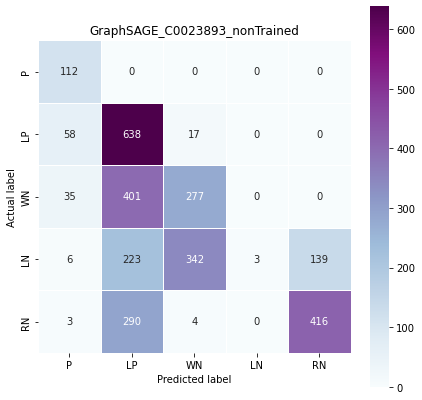

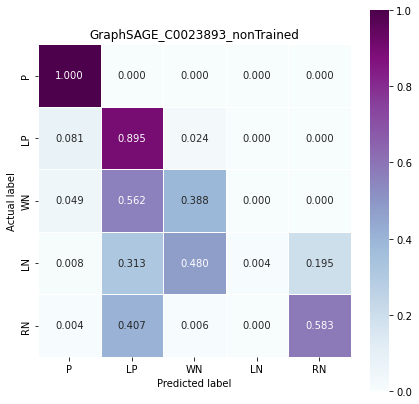

In [12]:
predict_from_saved_model('GraphSAGE_C0006142_40000_0_0005', dataset.to(device), ['P', 'LP', 'WN', 'LN', 'RN'], files_name='GraphSAGE_' + disease_Id + '_nonTrained')

### Results with training

  0%|          | 0/40001 [00:00<?, ?it/s]

[Epoch: 0000] train loss: 51.6491, train acc: 0.1092, val loss: 17.1695, val acc: 0.0425  (best train acc: 0.1092, best val acc: 0.0425, best train loss: 51.6491  @ epoch 0 )
[Epoch: 0020] train loss: 2.3694, train acc: 0.1708, val loss: 1.8692, val acc: 0.0975  (best train acc: 0.2640, best val acc: 0.2944, best train loss: 2.3694  @ epoch 20 )
[Epoch: 0040] train loss: 1.5887, train acc: 0.2984, val loss: 1.4797, val acc: 0.3427  (best train acc: 0.3044, best val acc: 0.3427, best train loss: 1.5887  @ epoch 40 )
[Epoch: 0060] train loss: 1.4484, train acc: 0.3560, val loss: 1.3877, val acc: 0.4118  (best train acc: 0.3560, best val acc: 0.4142, best train loss: 1.4475  @ epoch 58 )
[Epoch: 0080] train loss: 1.3862, train acc: 0.3944, val loss: 1.3446, val acc: 0.4304  (best train acc: 0.3944, best val acc: 0.4304, best train loss: 1.3862  @ epoch 80 )
[Epoch: 0100] train loss: 1.3894, train acc: 0.3679, val loss: 1.3182, val acc: 0.4546  (best train acc: 0.4069, best val acc: 0.4546

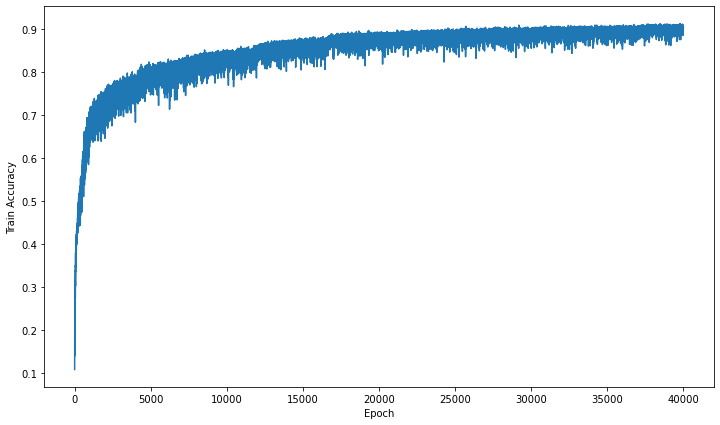

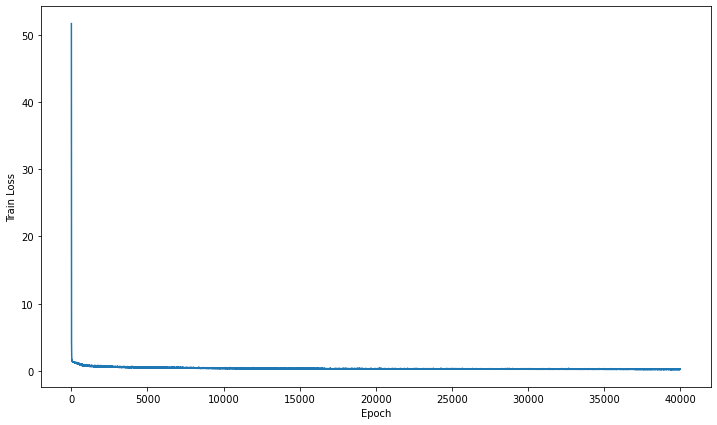

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       124
           1       0.94      0.96      0.95       710
           2       0.94      0.88      0.91       710
           3       0.84      0.84      0.84       710
           4       0.86      0.90      0.88       710

    accuracy                           0.90      2964
   macro avg       0.91      0.91      0.91      2964
weighted avg       0.90      0.90      0.90      2964



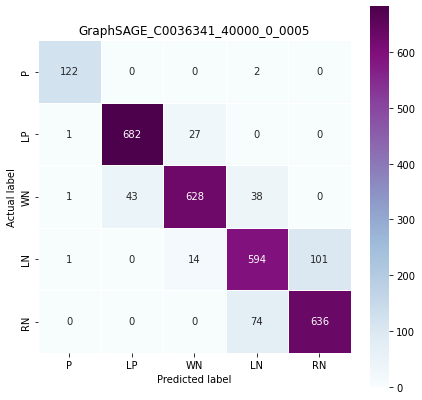

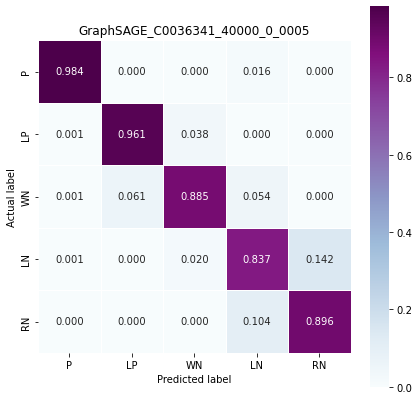

In [6]:
lr              = 0.001
epochs          = 40000
weight_decay    = 0.0005

classes         = ['P', 'LP', 'WN', 'LN', 'RN']
gnn_model = GNN7L_Sage(dataset).to(device)
pred = train(gnn_model, dataset, epochs, lr, weight_decay, classes, 'GraphSAGE_' + disease_Id)

In [4]:
import pandas as pd
import plotly.graph_objects as go


In [12]:

df = pd.read_csv('precision_positive_genes.csv', index_col=False)

In [11]:
n_positives = df['n_positives'].to_list()
C0006142 = df['C0006142'].to_list()
C0009402 = df['C0009402'].to_list()
C0023893 = df['C0023893'].to_list()
C0036341 = df['C0036341'].to_list()
C0376358 = df['C0376358'].to_list()

In [18]:
from turtle import width


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=n_positives,
    y=C0006142,
    mode='lines',
    name='C0006142'
))

fig.add_trace(go.Scatter(
    x=n_positives,
    y=C0009402,
    mode='lines',
    name='C0009402'
))

fig.add_trace(go.Scatter(
    x=n_positives,
    y=C0023893,
    mode='lines',
    name='C0023893'
))

fig.add_trace(go.Scatter(
    x=n_positives,
    y=C0036341,
    mode='lines',
    name='C0036341'
))

fig.add_trace(go.Scatter(
    x=n_positives,
    y=C0376358,
    mode='lines',
    name='C0376358'
))

fig.update_layout(
    title='Validation accuracy per number of P genes',
    xaxis_title='Number of P genes',
    yaxis_title='Validation accuracy (%)',
    width=600
)

fig.show()